### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [515]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [569]:
data = pd.read_csv('data/coupons.csv')

In [570]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [571]:
data.info()
# Getting a list of all columns with a sum of null values in each column
# Sorting the rows by count of null values 
missingData = data.isnull().sum().sort_values().to_frame(name='counts').reset_index().rename(columns={'index': 'colname'})

print(missingData)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [572]:
'''
Replace the null values with "Unknown" so that they can show up on the data visualization graphs 
as a separate value and so that we can exclude them from queries. The number of rows with null data
are <200 for each coupon type so have enough data to work with even if we exclude them
''' 

dataFilled = data.fillna("Unknown") 
# check if there is more missing data after data replacement
missingData = dataFilled.isnull().sum().sort_values().to_frame(name='counts').reset_index().rename(columns={'index': 'colname'})
print(missingData)

                 colname  counts
0            destination       0
1              passanger       0
2                weather       0
3            temperature       0
4                   time       0
5                 coupon       0
6             expiration       0
7                 gender       0
8                    age       0
9          maritalStatus       0
10          has_children       0
11             education       0
12            occupation       0
13                income       0
14                   car       0
15                   Bar       0
16           CoffeeHouse       0
17             CarryAway       0
18  RestaurantLessThan20       0
19      Restaurant20To50       0
20      toCoupon_GEQ5min       0
21     toCoupon_GEQ15min       0
22     toCoupon_GEQ25min       0
23        direction_same       0
24         direction_opp       0
25                     Y       0


4. What proportion of the total observations chose to accept the coupon?



In [596]:
# Function to take in a dataframe with acceptance rates and draw a bar plot to compare the acceptances
def barPlotAcceptanceRates(data,cohort):
    # Extract acceptance rate for plotting
    acceptanceDataFrame = data.query('Acceptance == 1')

    # Setting a size for the figure
    plt.figure(figsize=(20, 6))

    # Bar plot of acceptance rates for all cohorts for ease of comparison
    sns.barplot(x='Cohort', y='Proportion', data=acceptanceDataFrame)
    plt.title('Acceptance rates by ' + cohort)
    
    # save to data visualizations folder
    plt.savefig("DataVisualizations/" + cohort + "AcceptanceRatesBarPlot.png")
    
    plt.show()

In [574]:
# Function to calculate the acceptance rates for the cohort from the dataframe data
def createProportionDataFrame(data, cohort):
    # Proportion of coupons accepted
    couponsAccepted = data['Y'].value_counts(normalize=True)
    
    # Convert the series to a dataframe
    couponsAccepted = couponsAccepted.to_frame().reset_index()
    
    # Set the Cohort to the cohort passed in since they represent the proportions for those coupons accepted
    couponsAccepted['Cohort'] = cohort
    
    # Rename columns in place for readability 
    couponsAccepted.rename(columns={'Y':'Acceptance', 'proportion':'Proportion'}, inplace=True)
    
    # Reindex the columns for readability
    couponsAccepted = couponsAccepted.reindex(columns=['Cohort', 'Acceptance', 'Proportion'])

    # Print AcceptanceRates Dataframe
    print(couponsAccepted)

    # Return dataframe
    return couponsAccepted

  Cohort  Acceptance  Proportion
0    All           1    0.568433
1    All           0    0.431567


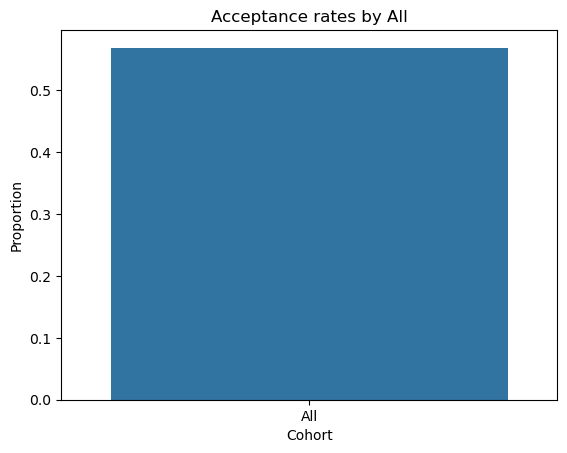

In [575]:
# Find acceptance rates for all coupons
allCouponsAccepted = createProportionDataFrame(dataFilled, 'All')
barPlotAcceptanceRates(allCouponsAccepted, 'All')

5. Use a bar plot to visualize the `coupon` column.

                  coupon  counts
0           Coffee House    3996
1        Restaurant(<20)    2786
2  Carry out & Take away    2393
3                    Bar    2017
4      Restaurant(20-50)    1492


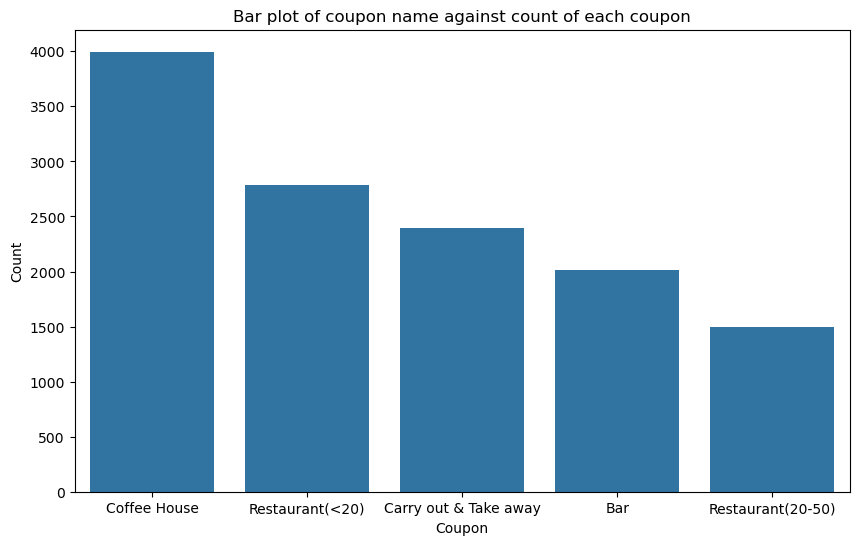

In [576]:
# Getting a count of coupon name to count of rows with that coupon name
couponData = dataFilled['coupon'].value_counts().to_frame(name='counts').reset_index()
print(couponData)

# Setting a size for the figure
plt.figure(figsize=(10, 6))
sns.barplot( data=couponData, x="coupon", y = "counts")
# Add a title to the plot
plt.title("Bar plot of coupon name against count of each coupon")
plt.xlabel('Coupon')
plt.ylabel('Count')

# save to data visualizations folder
plt.savefig("DataVisualizations/CouponColumnBarPlot.png")

#Display the plot
plt.show()

6. Use a histogram to visualize the temperature column.

In [577]:
# Custom function to create a histogram for visualizations of data in a column
# Parameters: value for x-axis, xlabel, title, filename

def createHistogram(xaxis,xlabel,title,filename,width=6.4,height=4.8):
    # Setting a size for the figure
    plt.figure(figsize=(width, height))
    # Plotting a histogram of xaxis with acceptance as hue, data is the filled in dataframe
    sns.histplot(data=dataFilled, x=xaxis, hue="Y", palette="magma")
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    
    # Add a title to the plot
    plt.title("Histogram of " + title + " column")
    
    # save to data visualizations folder
    plt.savefig("DataVisualizations/" + filename + "ColumnHistogram.png")
    plt.show()

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64


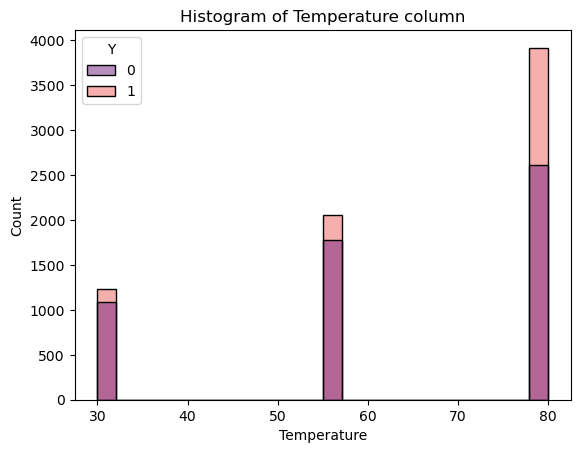

In [578]:
# Gettng unique temperature values with their counts
print(dataFilled['temperature'].value_counts())
# Plotting a histogram of temperature with acceptance as hue
createHistogram('temperature', 'Temperature',  'Temperature', 'Temperature')


**Plotting histograms of different columns to visualize data**


1. Histogram of coupon column with Acceptance Hue

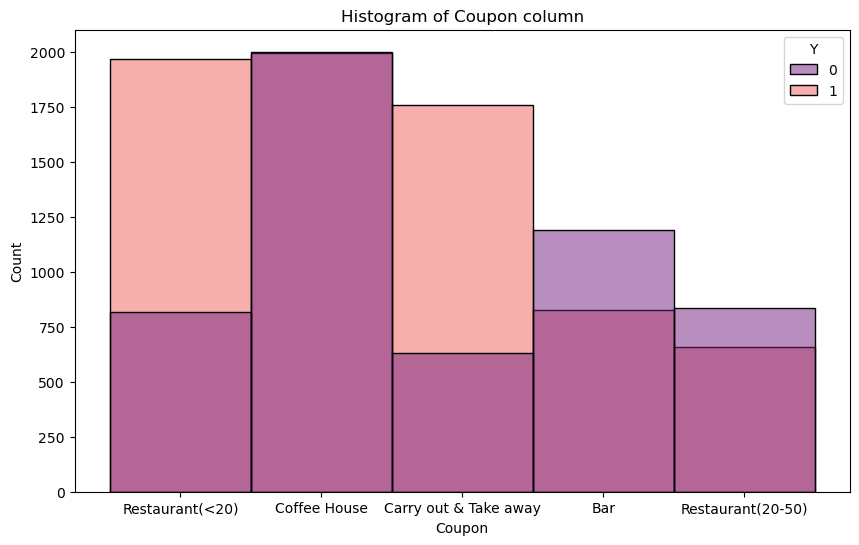

In [579]:
# Plotting a histogram of coupon with acceptance as hue
createHistogram('coupon', 'Coupon',  'Coupon', 'Coupon', 10, 6)

2. Histogram of Bar column with Acceptance Hue

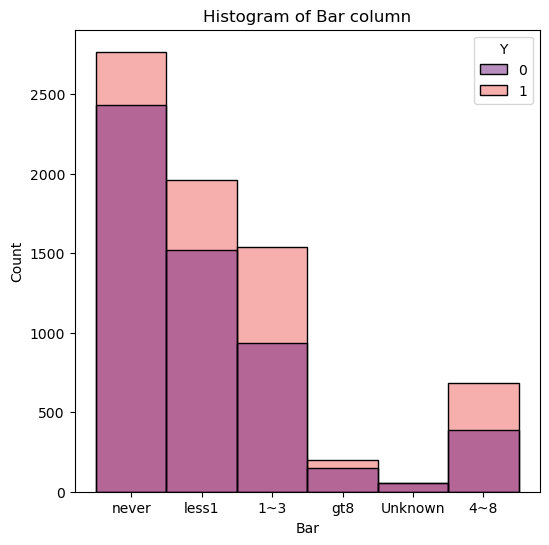

In [580]:
# Plotting a histogram of Bar with acceptance as hue
createHistogram('Bar', 'Bar',  'Bar', 'Bar', 6, 6)

3. Histogram of Age column with Acceptance Hue

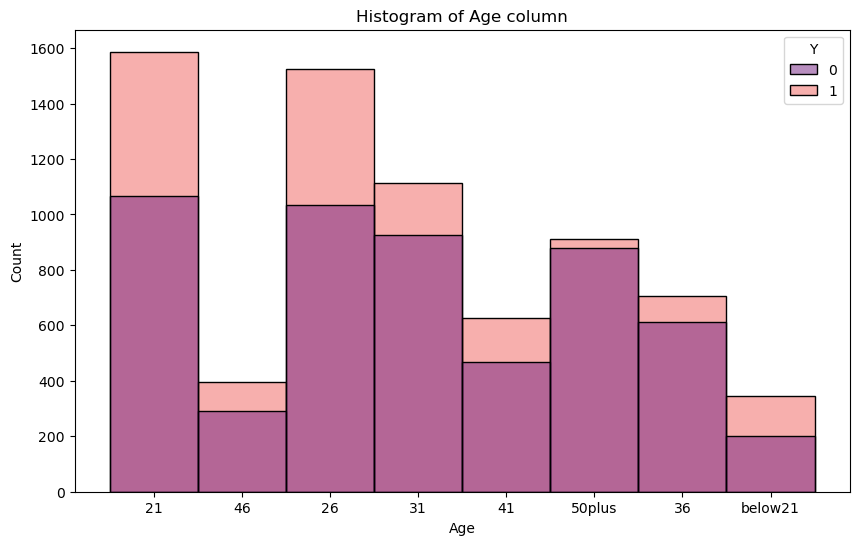

In [581]:
# Plotting a histogram of Age with acceptance as hue
createHistogram('age', 'Age',  'Age', 'Age', 10, 6)

4. Histogram of income column with Acceptance Hue

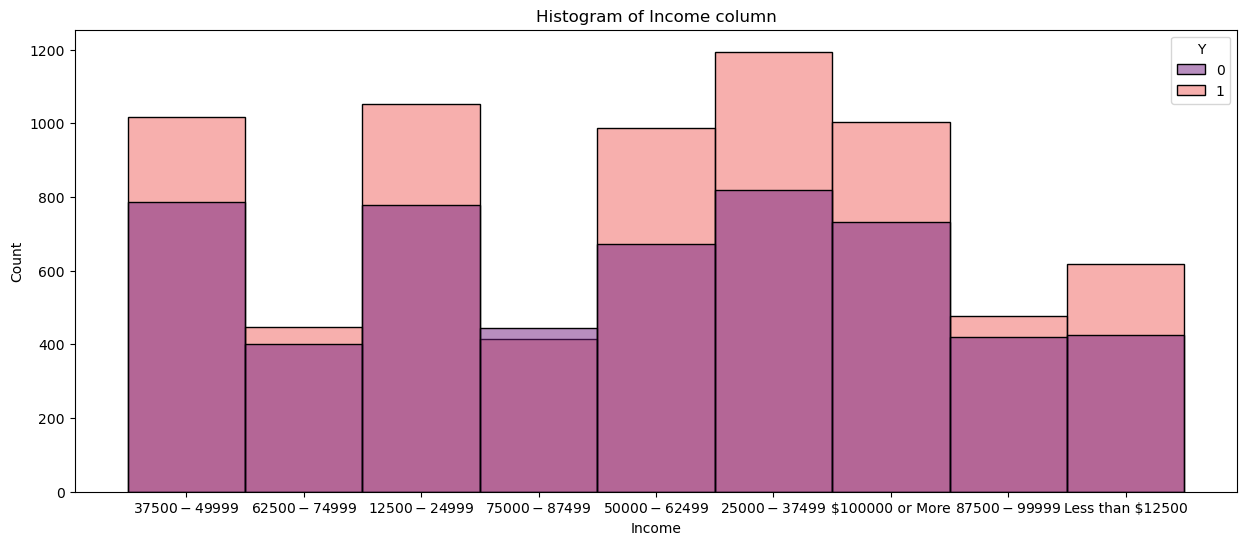

In [582]:
# Plotting a histogram of income with acceptance as hue
createHistogram('income', 'Income',  'Income', 'Income', 15, 6)

5. Histogram of maritalStatus column with Acceptance Hue

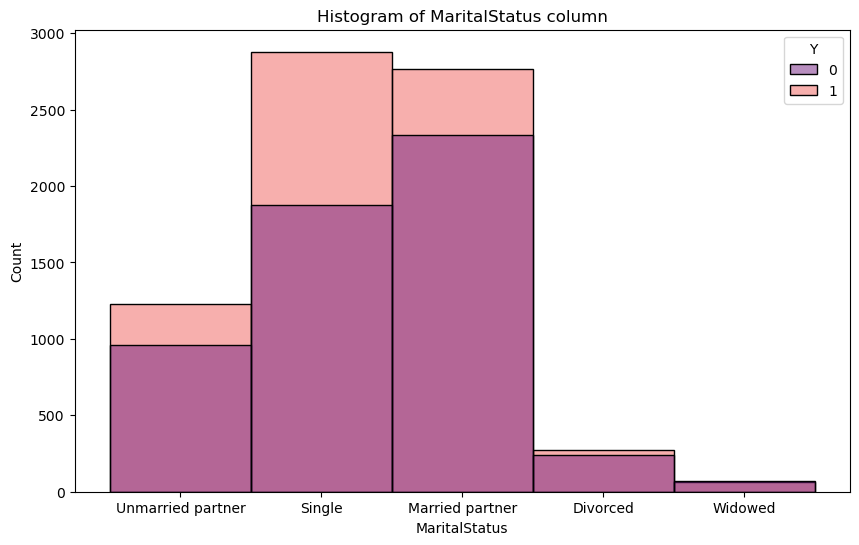

In [583]:
# Plotting a histogram of maritalStatus with acceptance as hue
createHistogram('maritalStatus', 'MaritalStatus',  'MaritalStatus', 'MaritalStatus', 10, 6)

6. Histogram of time column with Acceptance Hue

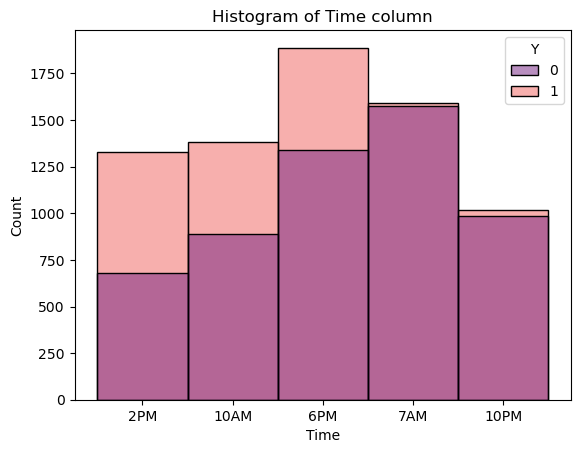

In [584]:
# Plotting a histogram of time with acceptance as hue
createHistogram('time', 'Time',  'Time', 'Time')

7. Histogram of weather column with Acceptance Hue

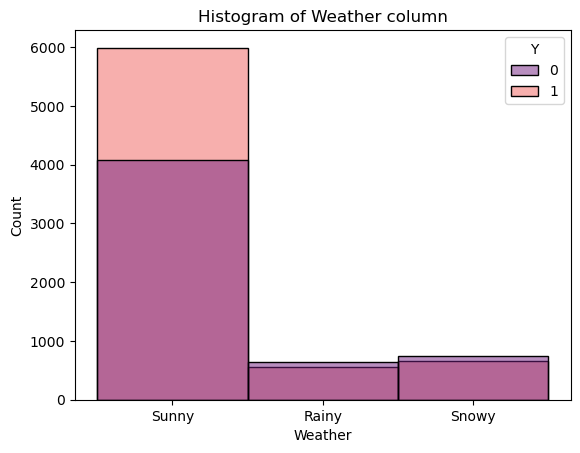

In [585]:
# Plotting a histogram of weather with acceptance as hue
createHistogram('weather', 'Weather',  'Weather', 'Weather')

8. Histogram of expiration column with Acceptance Hue

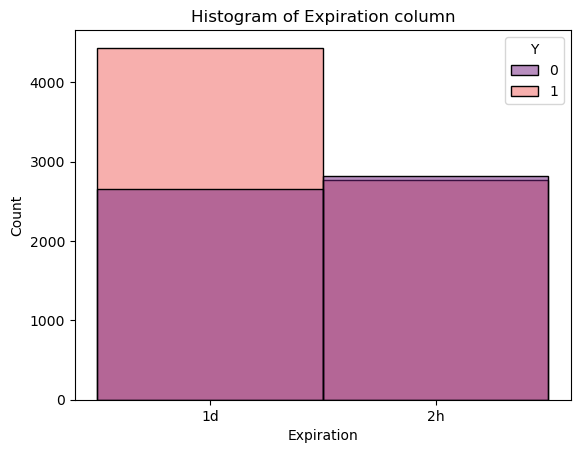

In [586]:
# Plotting a histogram of expiration with acceptance as hue
createHistogram('expiration', 'Expiration',  'Expiration', 'Expiration')

9. Histogram of passenger column with Acceptance Hue

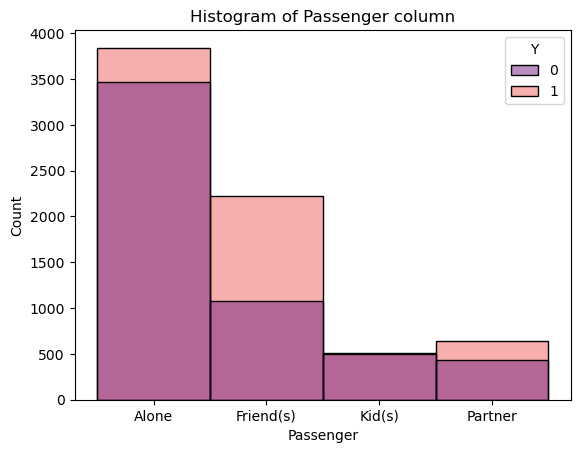

In [587]:
# Plotting a histogram of expiration with acceptance as hue
createHistogram('passanger', 'Passenger',  'Passenger', 'Passenger')

10. Histogram of occupation column with Acceptance Hue

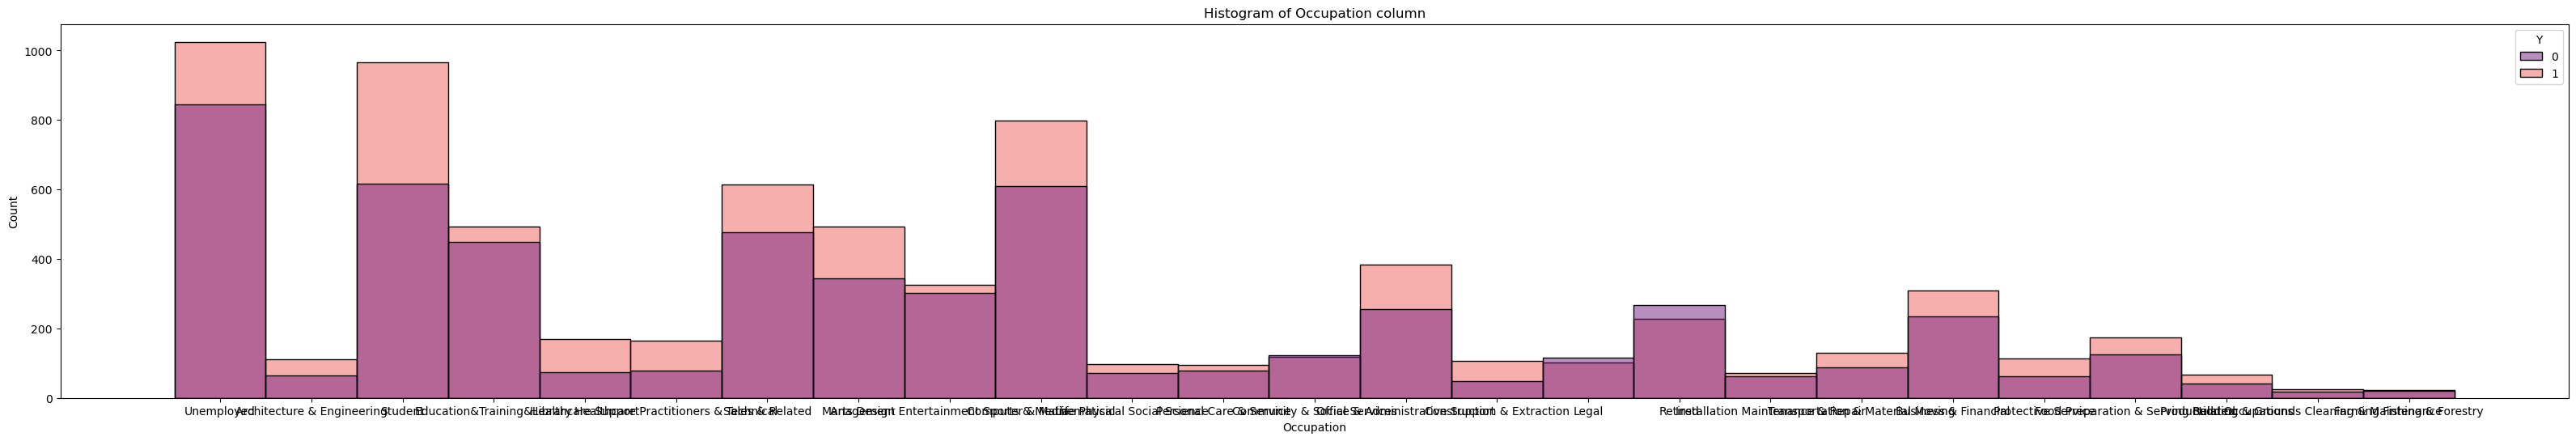

In [588]:
# Plotting a histogram of expiration with acceptance as hue
createHistogram('occupation', 'Occupation',  'Occupation', 'Occupation', 40, 6)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [589]:
# querying for all rows with Bar coupon and assigning them to dataForBarCoupons
dataForBarCoupons = dataFilled.query('coupon == "Bar"')
print(dataForBarCoupons.info())
#print(dataForBarCoupons.head(2))

# Drop rows where Bar values are unknown to have a clean data for analysis since we are using data from the
# Bar column in multiple comparisons
# Since only 21 of the 2017 rows were dropped, we have sufficient data to query
dataForBarCoupons = dataForBarCoupons.loc[dataForBarCoupons['Bar'] != "Unknown"]
print(dataForBarCoupons.info())
#print(dataForBarCoupons.head(2))

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   object
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  car                   2017 non-null   object
 15  Bar                   2017 non-null   obje

2. What proportion of bar coupons were accepted?


  Cohort  Acceptance  Proportion
0    Bar           0    0.589679
1    Bar           1    0.410321


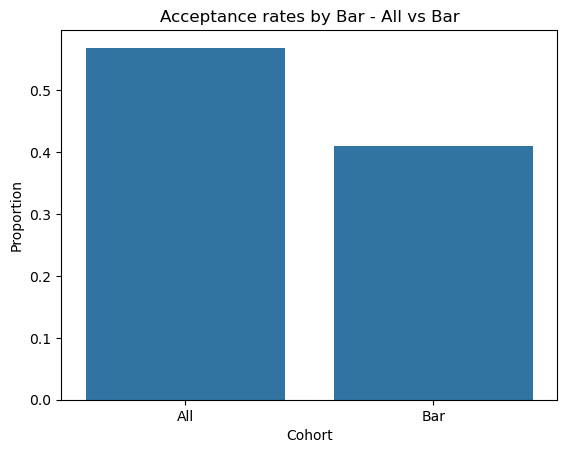

In [591]:
# Find acceptance rates for Bar coupons
barCouponsAccepted = createProportionDataFrame(dataForBarCoupons, 'Bar')

# Concatenate the Bar data to All Acceptance Rates
barCouponsAccepted = pd.concat([allCouponsAccepted, barCouponsAccepted], ignore_index=True)

# Draw bar plot
barPlotAcceptanceRates(barCouponsAccepted, 'Bar - All vs Bar')

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


  Cohort  Acceptance  Proportion
0  Bar<3           0    0.629382
1  Bar<3           1    0.370618
  Cohort  Acceptance  Proportion
0  Bar>3           1    0.768844
1  Bar>3           0    0.231156


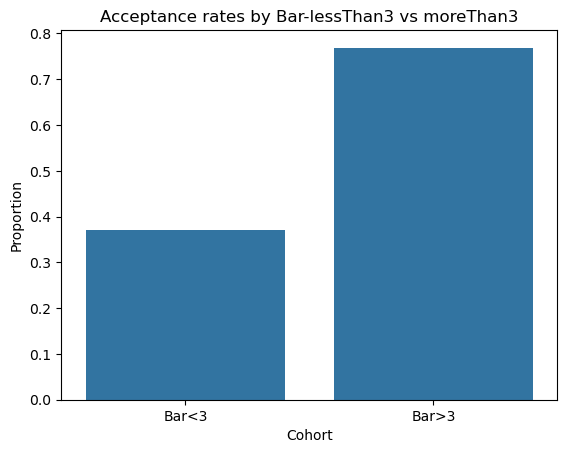

In [592]:
lessThan3 = ['less1', '1~3', 'never'] # Went to the bar 3 or fewer times
moreThan3 = ['4~8', 'gt8'] # Went to the bar more than 3 times

# Query for rows with people who went to the bar 3 or fewer times
queryResults1 = dataForBarCoupons.query('Bar in @lessThan3')

# Find acceptance rates
acceptanceRates1 = createProportionDataFrame(queryResults1, 'Bar<3')

# Query for rows with people who went to the bar more than 3 times
queryResults2 = dataForBarCoupons.query('Bar in @moreThan3')

# Find acceptance rates
acceptanceRates2 = createProportionDataFrame(queryResults2, 'Bar>3')

# Concatenate the Acceptance Rates
acceptanceRates = pd.concat([acceptanceRates1, acceptanceRates2], ignore_index=True)

# Draw bar plot
barPlotAcceptanceRates(acceptanceRates, 'Bar-lessThan3 vs moreThan3')

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


              Cohort  Acceptance  Proportion
0  Bars>1 and Age>25           1    0.695238
1  Bars>1 and Age>25           0    0.304762
               Cohort  Acceptance  Proportion
0  Bars!>1 or Age!>25           0    0.665609
1  Bars!>1 or Age!>25           1    0.334391


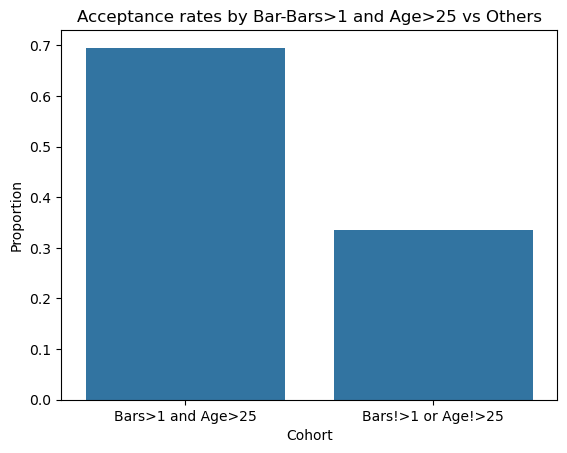

In [593]:
# Replace age column values which has strings with a numeric value for easy conversion to int
dataForBarCoupons.loc[dataForBarCoupons['age'] == '50plus','age'] = '50'
dataForBarCoupons.loc[dataForBarCoupons['age'] == 'below21','age'] = '21'

# Convert the age column to integer
dataForBarCoupons.loc[:,'age'] = dataForBarCoupons['age'].astype(int)

# Mask condition for people who go to bars more than once a month
moreThan1 = ['1~3','4~8', 'gt8']
queryResults1 = dataForBarCoupons.query('Bar in @moreThan1 and age > 25')

# Find acceptance rates
accepted1 = createProportionDataFrame(queryResults1, 'Bars>1 and Age>25')

# Query for remaining rows
queryResults2 = dataForBarCoupons.query('(Bar not in @moreThan1) or (not (age > 25))')

# Find acceptance rates
accepted2 = createProportionDataFrame(queryResults2, 'Bars!>1 or Age!>25')

# Concatenate the Acceptance Rates
acceptanceRates = pd.concat([accepted1, accepted2], ignore_index=True)

# Draw bar plot
barPlotAcceptanceRates(acceptanceRates, 'Bar-Bars>1 and Age>25 vs Others')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


                        Cohort  Acceptance  Proportion
0  Bars+Passengers+Occupations           1    0.717949
1  Bars+Passengers+Occupations           0    0.282051
   Cohort  Acceptance  Proportion
0  Others           0    0.622987
1  Others           1    0.377013


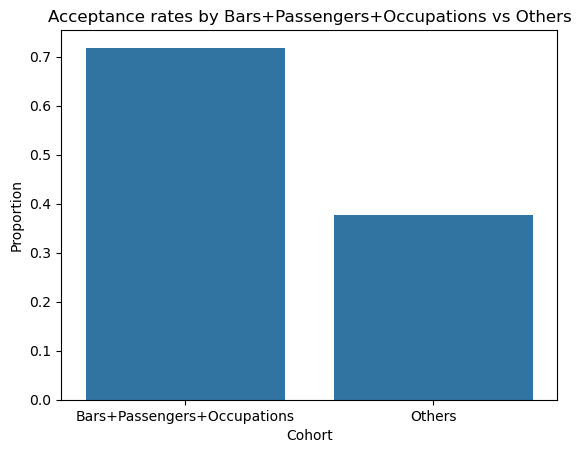

In [595]:
# Mask condition for people who go to bars more than once a month, who traveled with passengers 
# that were not a kid and did not travel alone,
# and had occupations other than farming, fishing, or forestry 
moreThan1 = ['1~3','4~8', 'gt8']
passengers = ['Alone', 'Kid(s)']
occupations = ['farming', 'fishing', 'forestry']
queryString1 = 'Bar in @moreThan1 and passanger not in @passengers and occupation not in @occupations'

queryResults1 = dataForBarCoupons.query(queryString)

# Find acceptance rates
accepted1 = createProportionDataFrame(queryResults1, 'Bars+Passengers+Occupations')

queryString2 = 'Bar not in @moreThan1 or passanger in @passengers or occupation in @occupations'

# Query for others
queryResults2 = dataForBarCoupons.query(queryString2)

# Find acceptance rates
accepted2 = createProportionDataFrame(queryResults2, 'Others')

# Concatenate the Bar data to Total Acceptance Rates
acceptanceRates = pd.concat([accepted1, accepted2], ignore_index=True)

# Draw bar plot
barPlotAcceptanceRates(acceptanceRates, 'Bars+Passengers+Occupations vs Others')

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [597]:
moreThan1Bars = ['1~3','4~8', 'gt8']
passengers = ['Alone', 'Kid(s)']
moreThan4Res = ['4~8', 'gt8']
incomeLessThan50k = ['Less than $12500', '$12500 - $24999','$25000 - $37499', '$37500 - $49999']

In [598]:
queryString1 = 'Bar in @moreThan1Bars and passanger not in @passengers and maritalStatus != "Widowed"'
queryResults1 = dataForBarCoupons.query(queryString1)
# Find acceptance rates
accepted1 = createProportionDataFrame(queryResults1, 'Bars > 1 and Passenger not a Kid and not Widowed')

                                             Cohort  Acceptance  Proportion
0  Bars > 1 and Passenger not a Kid and not Widowed           1    0.717949
1  Bars > 1 and Passenger not a Kid and not Widowed           0    0.282051


In [599]:
queryString2 = 'Bar in @moreThan1Bars and age < 30'
queryResults2 = dataForBarCoupons.query(queryString2)
# Find acceptance rates
accepted2 = createProportionDataFrame(queryResults2, 'Bars > 1 and Age < 30')

                  Cohort  Acceptance  Proportion
0  Bars > 1 and Age < 30           1    0.721739
1  Bars > 1 and Age < 30           0    0.278261


                      Cohort  Acceptance  Proportion
0  CheapRes>4 and Income<50k           0    0.542773
1  CheapRes>4 and Income<50k           1    0.457227


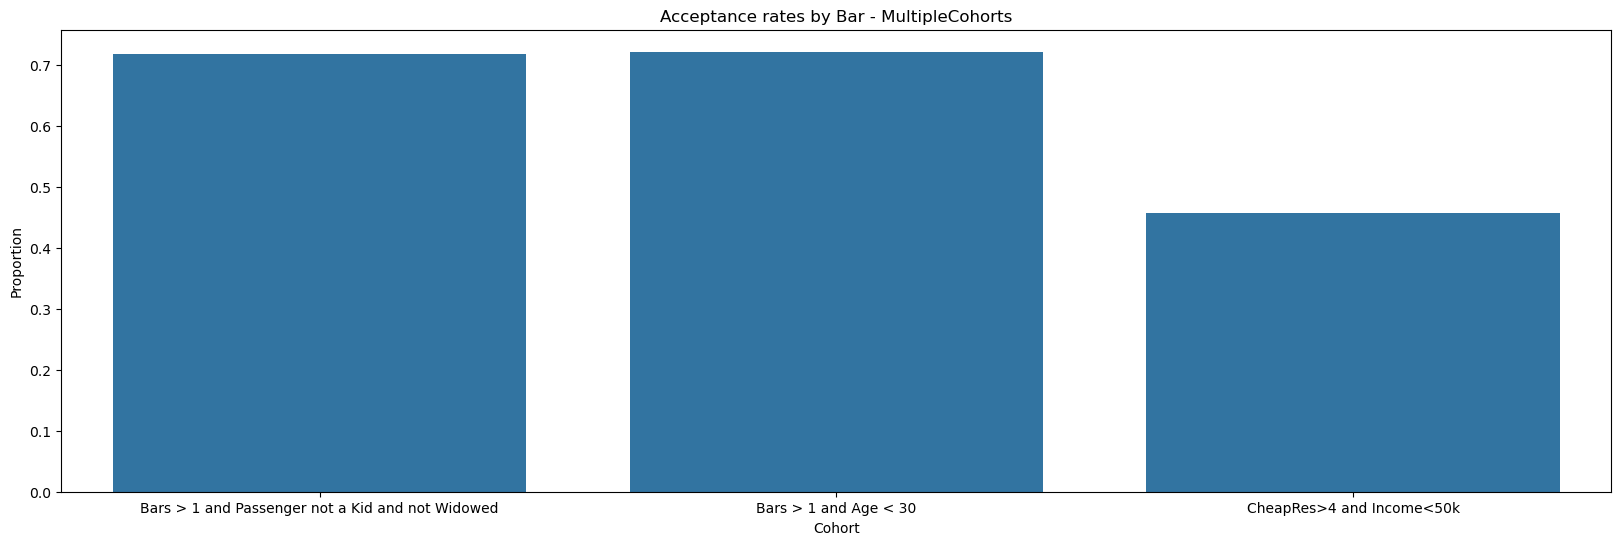

In [601]:
queryString3 = 'RestaurantLessThan20 in @moreThan4Res and income in @incomeLessThan50k'
queryResults3 = dataForBarCoupons.query(queryString3)
# Find acceptance rates
accepted3 = createProportionDataFrame(queryResults3, 'CheapRes>4 and Income<50k')

# Concatenate to Total Acceptance Rates
acceptanceRates = pd.concat([accepted1, accepted2, accepted3], ignore_index=True)

# Draw bar plot
barPlotAcceptanceRates(acceptanceRates, 'Bar - MultipleCohorts')

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Overall coupon Acceptance Rate vs Bar coupons:**

**Cohort "All":** The overall acceptance rate for the "All" cohort is 56.84% (proportion of 1).

**Cohort "Bar":** The overall acceptance rate for the "Bar" cohort is 41.03% (proportion of 1).

The "All" cohort has a significantly higher acceptance rate (56.84%) compared to the "Bar" cohort (41.03%). 

**Comparison between drivers who go to bars 3 times or less per month and others**

**Cohort 1 - who go to bars 3 times or less per month":** The acceptance proportion is 0.370618 i.e. 37.06% of the individuals in this cohort were accepted.

**Cohort 2 - who go to bars more than 3 times per month:** The acceptance proportion is 0.768844. i.e. 76.88% of individuals in this cohort accepted.

The acceptance rate for individuals is significantly higher in the Cohort 1 (76.88%) compared to the Cohort 2 (37.06%).  The difference is approximately 39.82 percentage points.  This suggests a strong positive relationship between number of times drivers go to bars and the acceptance rate. 

**Comparison between drivers who go to bars 1 times more per month and are over age 25 and others**

**Cohort 1:** Individuals over 25 who frequent bars more than once a month.  Their acceptance rate is 0.695238 (or 69.52%). 

**Cohort 2:** All other individuals (this includes those under 25, those over 25 who don't frequent bars, or a combination). Their acceptance rate is 0.334391 (or 33.44%).

The stark difference in acceptance rates (nearly double) strongly suggests that frequenting bars more than once a month after the age of 25 is a significant predictor of acceptance.  This implies a positive correlation between bar frequency and acceptance rates.

**Comparison between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry and others**

The rate of acceptance of bar coupons is significantly higher for drivers who frequent bars (more than once a month), carry adult passengers with non-farming/fishing/forestry occupations (0.717949) compared to the rate for all other drivers (0.377013).

**Difference:** 0.717949 - 0.377013 = 0.340936

**Percentage Difference:** (0.717949 - 0.377013) / 0.377013 * 100% ≈ 90.9%

The first cohort is nearly 91% more likely to accept bar coupons than the second cohort. This suggests a positive correlation between frequent bar visits (more than once a month) and coupon acceptance.

Drivers without children as passengers show a greater willingness to accept coupons. This may be because children are not permitted in bars, or because drivers with children have less disposable income.  (This assumes the children are their own.)

Furthermore, this might indicate that occupations outside of farming, fishing, and forestry offer higher disposable incomes, enabling greater coupon acceptance.

**Analysis of below acceptance rates for drivers belonging to below cohorts:
Cohort 1: go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
Cohort 2: go to bars more than once a month and are under the age of 30 OR
Cohort 3: go to cheap restaurants more than 4 times a month and income is less than 50K.**

**Cohort 1:** 0.717949  This means that among individuals who frequented more than one bar, were not children, and were not widowed, 71.79% accepted the bar coupon.

**Cohort 2:** 0.721739  This indicates that among individuals who frequented more than one bar and were under 30 years old, 72.17% accepted the bar coupon.

**Cohort 3:** 0.457227 This shows that among individuals who used cheap restaurants more than 4 times and had an income less than $50,000, only 45.72% accepted the bar coupon.

**Age and Bar Frequency:**  Younger individuals (under 30) who frequent multiple bars showed a high acceptance rate for the coupon, similar to the broader group of non-kid, non-widowed bar-goers.

**Income and Restaurant Choice:**  Individuals with lower incomes who frequently used cheap restaurants had a significantly lower coupon acceptance rate.  This suggests income level and dining preferences might be strong predictors of coupon usage.



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**Investigating the Coffee House Coupons**

1. Create a new DataFrame that contains just the coffee house coupons.

In [612]:
# querying for all rows with Coffee House coupon and assigning them to dataForCHCoupons
dataForCHCoupons = dataFilled.query('coupon == "Coffee House"')
print(dataForCHCoupons.info())
print(dataForCHCoupons.head(2))

<class 'pandas.core.frame.DataFrame'>
Index: 3996 entries, 1 to 12681
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3996 non-null   object
 1   passanger             3996 non-null   object
 2   weather               3996 non-null   object
 3   temperature           3996 non-null   int64 
 4   time                  3996 non-null   object
 5   coupon                3996 non-null   object
 6   expiration            3996 non-null   object
 7   gender                3996 non-null   object
 8   age                   3996 non-null   object
 9   maritalStatus         3996 non-null   object
 10  has_children          3996 non-null   int64 
 11  education             3996 non-null   object
 12  occupation            3996 non-null   object
 13  income                3996 non-null   object
 14  car                   3996 non-null   object
 15  Bar                   3996 non-null   obje

2. What proportion of Coffee House coupons were accepted?

  Cohort  Acceptance  Proportion
0    All           1    0.568433
1    All           0    0.431567
        Cohort  Acceptance  Proportion
0  CoffeeHouse           0    0.500751
1  CoffeeHouse           1    0.499249


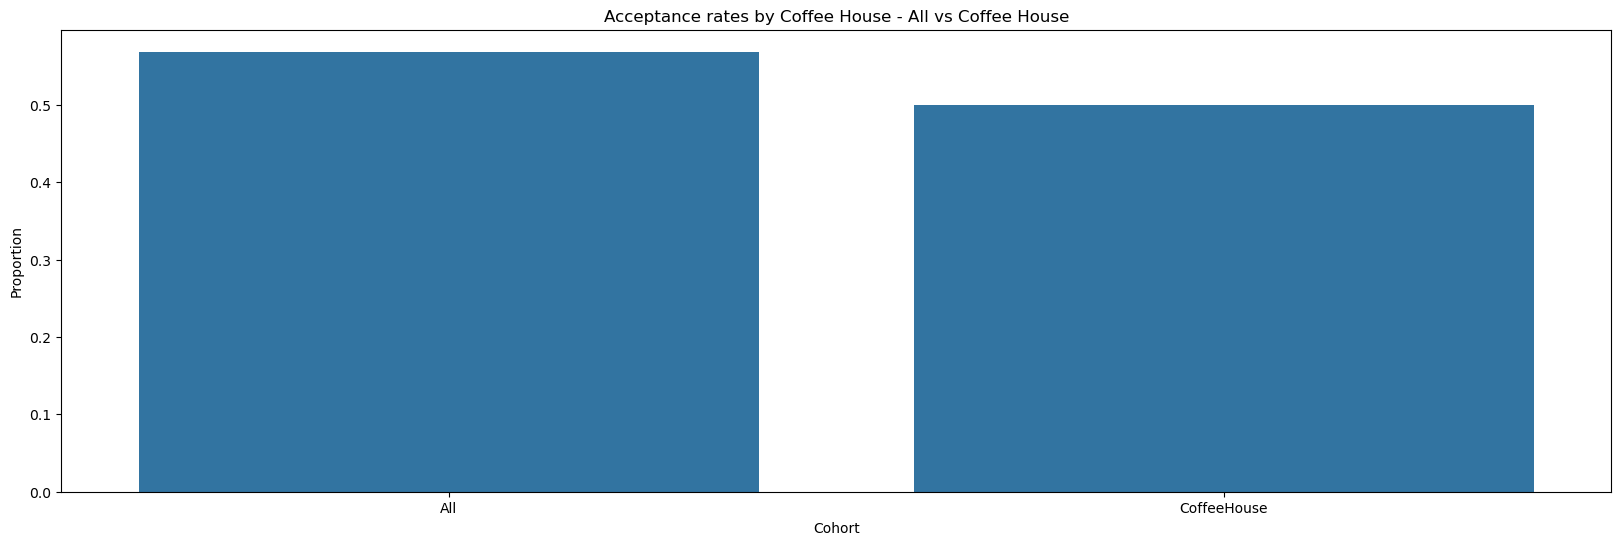

In [605]:
couponsAccepted = createProportionDataFrame(dataFilled, 'All')
coffeeHouseCouponsAccepted = createProportionDataFrame(dataForCHCoupons, 'CoffeeHouse')

# Concatenate the Bar Coffee House to Total Acceptance Rates
acceptanceRates = pd.concat([couponsAccepted, coffeeHouseCouponsAccepted], ignore_index=True)

# Draw bar plot
barPlotAcceptanceRates(acceptanceRates, 'Coffee House - All vs Coffee House')

3. Compare the acceptance rate between drivers over the age of 25 to the all others. Is there a difference?

   Cohort  Acceptance  Proportion
0  age<25           1    0.550096
1  age<25           0    0.449904
   Cohort  Acceptance  Proportion
0  age>25           0    0.518594
1  age>25           1    0.481406


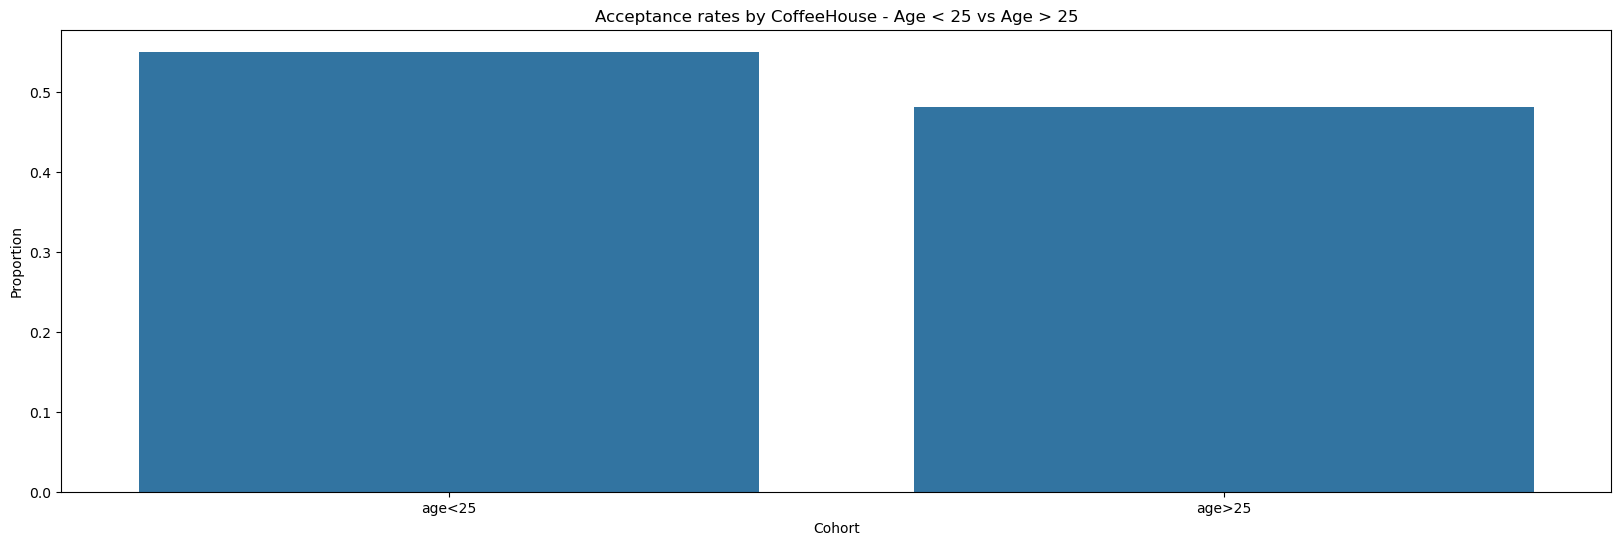

In [606]:
# Replace age column values with strings with a numeric value
dataForCHCoupons.loc[dataForCHCoupons['age'] == '50plus','age'] = '50'
dataForCHCoupons.loc[dataForCHCoupons['age'] == 'below21','age'] = '21'

# Convert the age column to integer and query for rows of people who have age more than 25
dataForCHCoupons.loc[:,'age'] = dataForCHCoupons['age'].astype(int)

# Query for acceptance rates where age < 25
queryResults1 = dataForCHCoupons.query('age < 25')
acceptedDataframe1 = createProportionDataFrame(queryResults1, 'age<25')

# Query for acceptance rates where age > 25
queryResults2 = dataForCHCoupons.query('age > 25')
acceptedDataframe2 = createProportionDataFrame(queryResults2, 'age>25')

# Concatenate the Bar data to Total Acceptance Rates
acceptanceRates = pd.concat([acceptedDataframe1, acceptedDataframe2], ignore_index=True)

# Draw bar plot
barPlotAcceptanceRates(acceptanceRates, 'CoffeeHouse - Age < 25 vs Age > 25')

4. Compare the acceptance rates between different geographical locations. Is there a difference?

    Cohort  Acceptance  Proportion
0  GEQ5min           0    0.500751
1  GEQ5min           1    0.499249
     Cohort  Acceptance  Proportion
0  GEQ15min           0    0.546068
1  GEQ15min           1    0.453932
     Cohort  Acceptance  Proportion
0  GEQ25min           0    0.654839
1  GEQ25min           1    0.345161


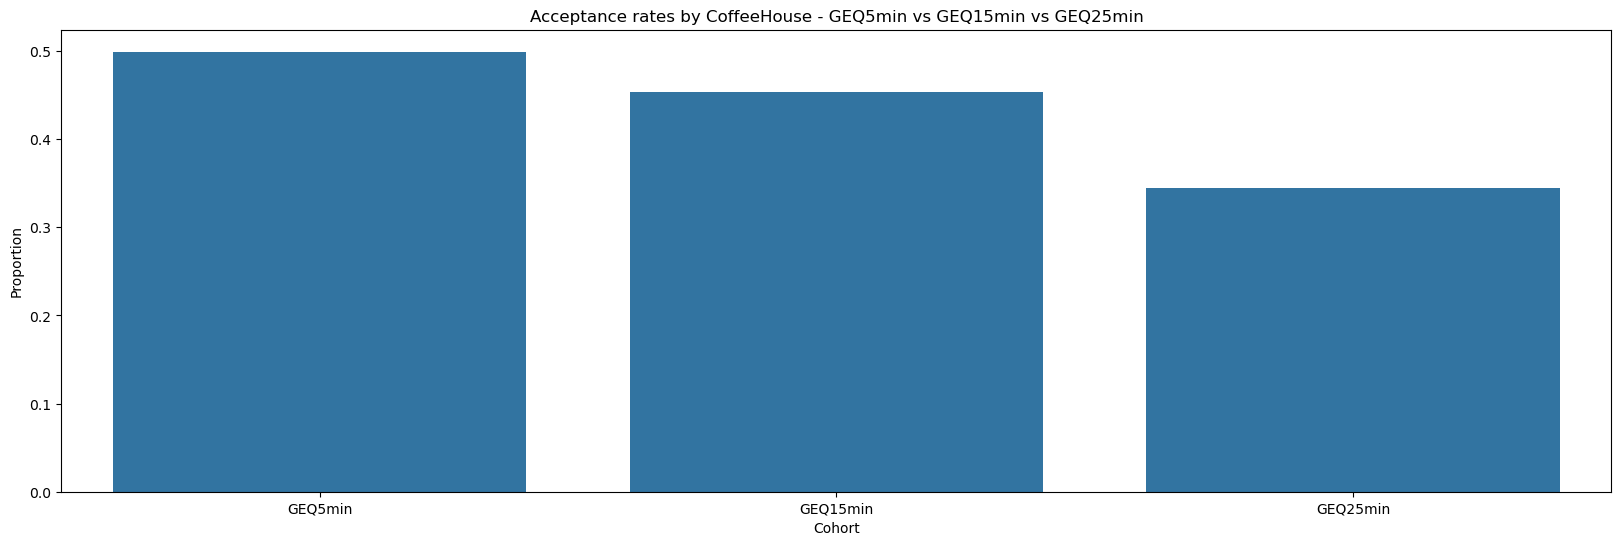

In [607]:
# Query for acceptance rates where toCoupon_GEQ5min
queryResults1 = dataForCHCoupons.query('toCoupon_GEQ5min == 1')
acceptedDataframe1 = createProportionDataFrame(queryResults1, 'GEQ5min')

# Query for acceptance rates where toCoupon_GEQ15min
queryResults2 = dataForCHCoupons.query('toCoupon_GEQ15min == 1')
acceptedDataframe2 = createProportionDataFrame(queryResults2, 'GEQ15min')

# Query for acceptance rates where toCoupon_GEQ15min
queryResults3 = dataForCHCoupons.query('toCoupon_GEQ25min == 1')
acceptedDataframe3 = createProportionDataFrame(queryResults3, 'GEQ25min')

# Concatenate the Bar data to Total Acceptance Rates
acceptanceRates = pd.concat([acceptedDataframe1, acceptedDataframe2, acceptedDataframe3], ignore_index=True)

# Draw bar plot
barPlotAcceptanceRates(acceptanceRates, 'CoffeeHouse - GEQ5min vs GEQ15min vs GEQ25min')

5. Compare the acceptance rates when the direction is same and different. Is there a difference?

                Cohort  Acceptance  Proportion
0  direction_same == 1           1    0.530667
1  direction_same == 1           0    0.469333
               Cohort  Acceptance  Proportion
0  direction_opp == 1           0     0.50801
1  direction_opp == 1           1     0.49199


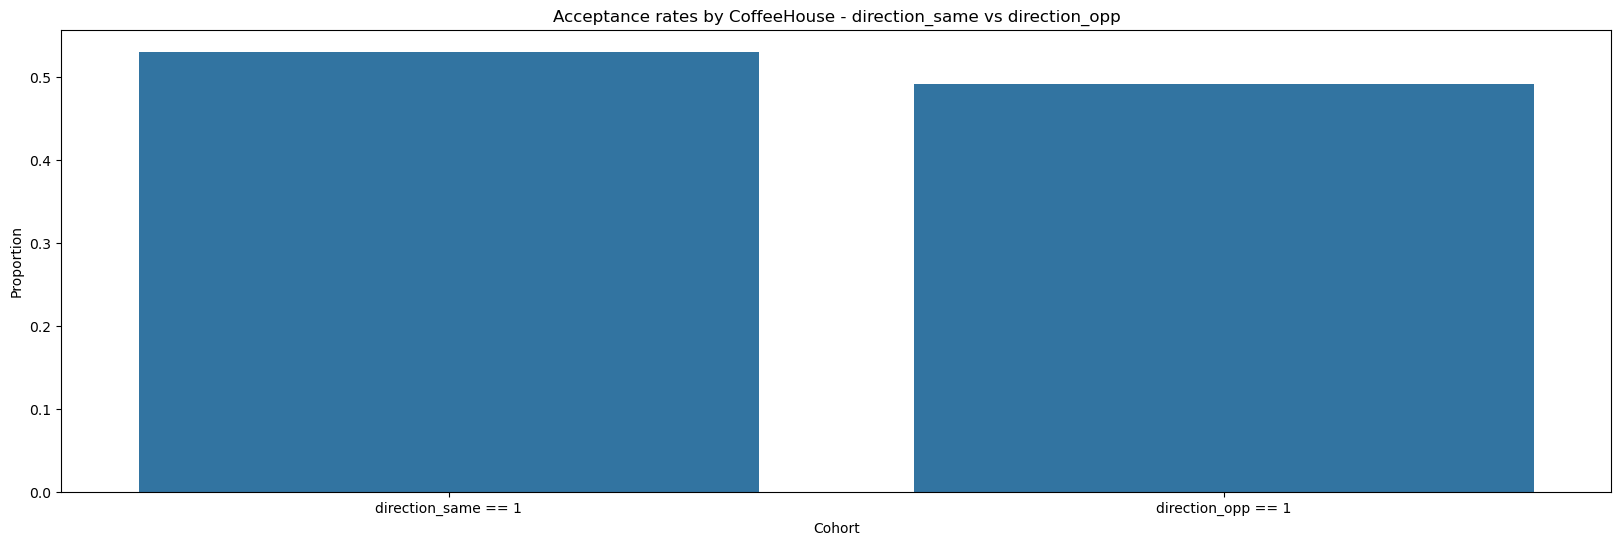

In [608]:
# Query for acceptance rates where direction_same == 1
queryResults1 = dataForCHCoupons.query('direction_same == 1')
acceptedDataframe1 = createProportionDataFrame(queryResults1, 'direction_same == 1')

# Query for acceptance rates where direction_opp
queryResults2 = dataForCHCoupons.query('direction_opp == 1')
acceptedDataframe2 = createProportionDataFrame(queryResults2, 'direction_opp == 1')

# Concatenate the Bar data to Total Acceptance Rates
acceptanceRates = pd.concat([acceptedDataframe1, acceptedDataframe2], ignore_index=True)

# Draw bar plot
barPlotAcceptanceRates(acceptanceRates, 'CoffeeHouse - direction_same vs direction_opp')

6. Compare the acceptance rates when coupons are given in the morning, afternoon and evening. Is there a difference?

    Cohort  Acceptance  Proportion
0  morning           1    0.542494
1  morning           0    0.457506
      Cohort  Acceptance  Proportion
0  afternoon           1    0.547859
1  afternoon           0    0.452141
    Cohort  Acceptance  Proportion
0  evening           0    0.584892
1  evening           1    0.415108


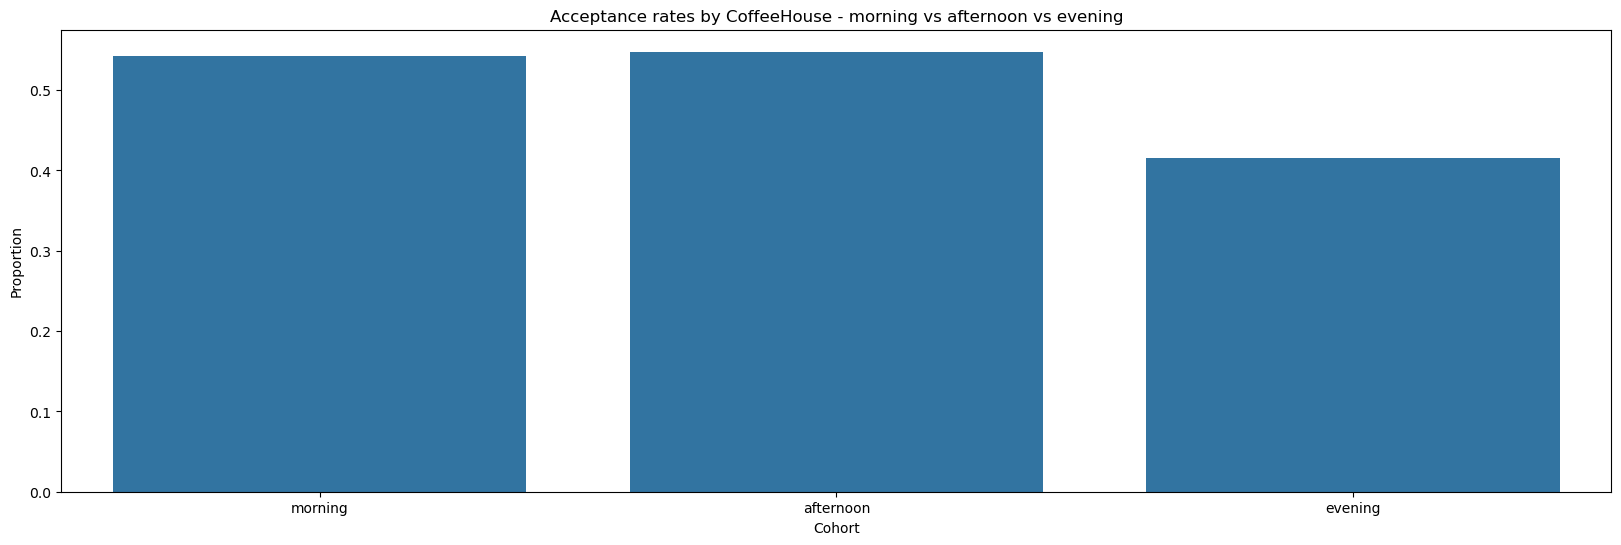

In [609]:
# Defining what times fall under morning, afternoon and evening
morning = ['7AM', '10AM']
afternoon = ['2PM']
evening = ['6PM', '10PM']

# Query for acceptance rates where time in @morning
queryResults1 = dataForCHCoupons.query('time in @morning')
acceptedDataframe1 = createProportionDataFrame(queryResults1, 'morning')

# Query for acceptance rates where time in @afternoon
queryResults2 = dataForCHCoupons.query('time in @afternoon')
acceptedDataframe2 = createProportionDataFrame(queryResults2, 'afternoon')

# Query for acceptance rates where time in @evening
queryResults3 = dataForCHCoupons.query('time in @evening')
acceptedDataframe3 = createProportionDataFrame(queryResults3, 'evening')

# Concatenate the Bar data to Total Acceptance Rates
acceptanceRates = pd.concat([acceptedDataframe1, acceptedDataframe2, acceptedDataframe3], ignore_index=True)

# Draw bar plot
barPlotAcceptanceRates(acceptanceRates, 'CoffeeHouse - morning vs afternoon vs evening')

7. Compare the acceptance rates when coupons are given in sunny, snowy and rainy weather. Is there a difference?

  Cohort  Acceptance  Proportion
0  Sunny           1    0.503605
1  Sunny           0    0.496395
  Cohort  Acceptance  Proportion
0  Rainy           1    0.522124
1  Rainy           0    0.477876
  Cohort  Acceptance  Proportion
0  Snowy           0    0.567657
1  Snowy           1    0.432343


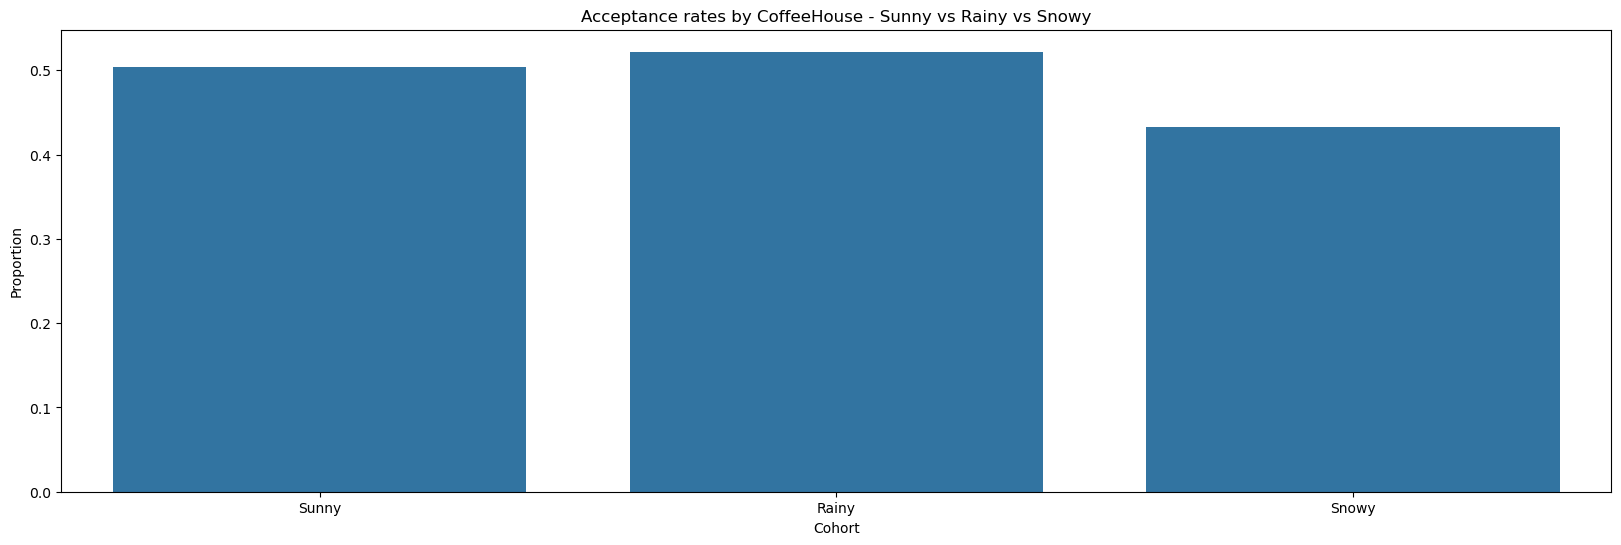

In [610]:
# Query for acceptance rates where weather is sunny
queryResults1 = dataForCHCoupons.query('weather == "Sunny"')
acceptedDataframe1 = createProportionDataFrame(queryResults1, 'Sunny')

# Query for acceptance rates where weather is rainy
queryResults2 = dataForCHCoupons.query('weather == "Rainy"')
acceptedDataframe2 = createProportionDataFrame(queryResults2, 'Rainy')

# Query for acceptance rates where weather is snowy
queryResults3 = dataForCHCoupons.query('weather == "Snowy"')
acceptedDataframe3 = createProportionDataFrame(queryResults3, 'Snowy')

# Concatenate the Bar data to Total Acceptance Rates
acceptanceRates = pd.concat([acceptedDataframe1, acceptedDataframe2, acceptedDataframe3], ignore_index=True)

# Draw bar plot
barPlotAcceptanceRates(acceptanceRates, 'CoffeeHouse - Sunny vs Rainy vs Snowy')

8. Compare the acceptance rates when coupons are given with expiration of 1 day vs 2 hours. Is there a difference?

  Cohort  Acceptance  Proportion
0   1Day           1    0.583946
1   1Day           0    0.416054
   Cohort  Acceptance  Proportion
0  2Hours           0    0.568029
1  2Hours           1    0.431971


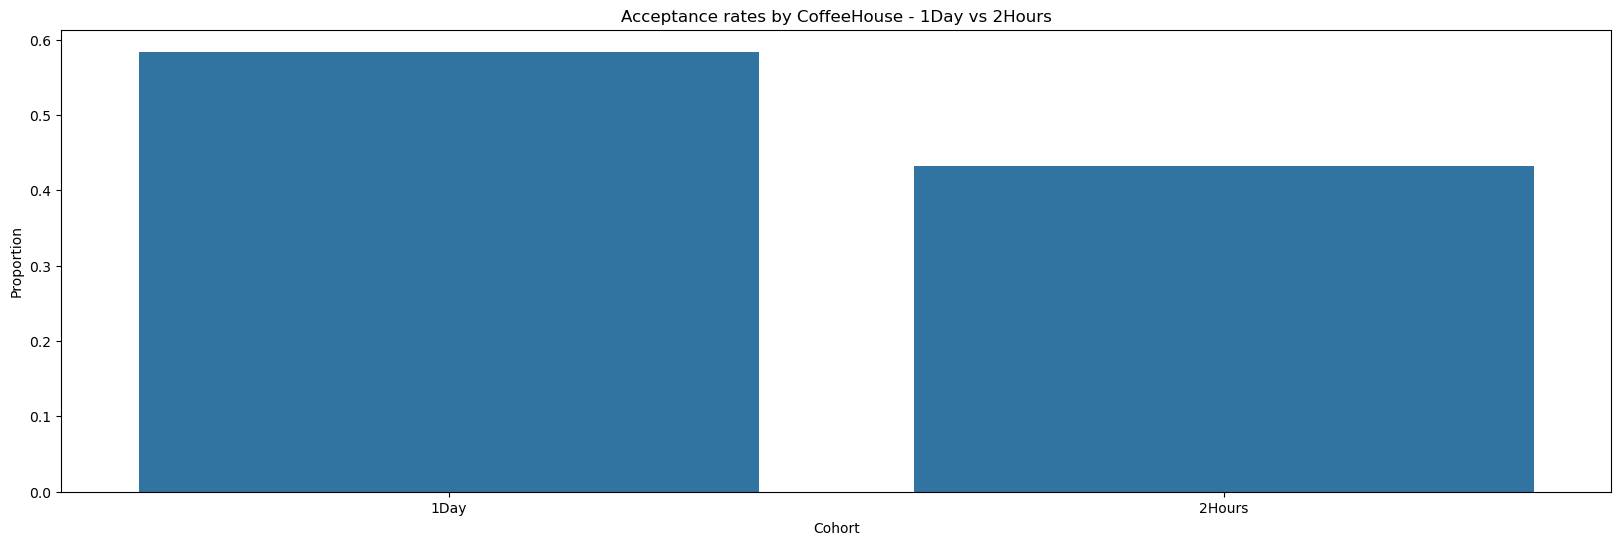

In [611]:
# Query for acceptance rates where expiration is 1 day
queryResults1 = dataForCHCoupons.query('expiration == "1d"')
acceptedDataframe1 = createProportionDataFrame(queryResults1, '1Day')

# Query for acceptance rates where expiration is 2 hours
queryResults2 = dataForCHCoupons.query('expiration == "2h"')
acceptedDataframe2 = createProportionDataFrame(queryResults2, '2Hours')

# Concatenate the Bar data to Total Acceptance Rates
acceptanceRates = pd.concat([acceptedDataframe1, acceptedDataframe2], ignore_index=True)

# Draw bar plot
barPlotAcceptanceRates(acceptanceRates, 'CoffeeHouse - 1Day vs 2Hours')

9. Based on these observations, what do you hypothesize about conditions that affected the acceptance of the coffee house coupons?

The data shows the acceptance proportion for different cohorts.  Comparing them

**1) All vs Coffee House:**

* **All:** 56.8% acceptance rate.
* **Coffee House:** 49.9% acceptance rate.

The "All" cohort has a significantly higher acceptance rate than the "Coffee House" cohort (a difference of almost 7 percentage points). This suggests that coffee house coupons have lower acceptance rate when compared to acceptance rate for all coupons

**2) Age <25 vs Age >25:**

* **Age <25:** 55.0% acceptance rate.
* **Age >25:** 48.1% acceptance rate.

The younger cohort (age <25) shows a higher acceptance rate than the older cohort (age >25) by approximately 7 percentage points.

**3) GEQ5min vs GEQ15min vs GEQ25min:**

* **GEQ5min:** 49.9% acceptance rate.
* **GEQ15min:** 45.4% acceptance rate.
* **GEQ25min:** 34.5% acceptance rate.

There's a clear trend here: as the minimum time spent in traveling increases, the acceptance rate decreases.  The difference between 5 minutes and 25 minutes is substantial (a 15.4 percentage point drop). This suggests that longer durations spent traveling are negatively correlated with acceptance.

**4) Direction_same vs Direction_opp:**

* **Direction_same:** 53.1% acceptance rate.
* **Direction_opp:** 49.2% acceptance rate.

Those traveling in the same direction have a slightly higher acceptance rate than those traveling in opposite directions (a difference of around 4 percentage points).

**5) Morning vs Afternoon vs Evening:**

* **Morning:** 54.2% acceptance rate.
* **Afternoon:** 54.8% acceptance rate.
* **Evening:** 41.5% acceptance rate.

The evening shows a considerably lower acceptance rate compared to the morning and afternoon.  Morning and afternoon have very similar acceptance rates.

**6) Sunny vs Rainy vs Snowy:**

* **Sunny:** 50.4% acceptance rate.
* **Rainy:** 52.2% acceptance rate.
* **Snowy:** 43.2% acceptance rate.

Rainy weather shows a slightly higher acceptance rate than sunny weather. Snowy weather has a significantly lower acceptance rate than both sunny and rainy weather.

**7) 1Day vs 2Hour:**

* **1Day:** 58.4% acceptance rate.
* **2Hour:** 43.2% acceptance rate.

There's a large difference in acceptance rates between those with a 1-day timeframe and those with a 2-hour timeframe.  The longer timeframe (1 day) has a much higher acceptance rate probably because the drivers can plan better to use the coupons.


**In summary:**  Several factors consistently show a negative correlation with acceptance rates: longer wait times (GEQ15min, GEQ25min), evening time, and snowy weather. Conversely, shorter wait times (implied by the "All" cohort and others), younger age, and rainy weather show relatively higher acceptance rates.  The differences in acceptance rates between some categories are quite substantial, suggesting these factors are significant predictors of acceptance.
